# 얼굴 인식 등의 이미지 관련 API 사용

## 1. 네이버 얼굴인식 기능

In [1]:
#https://developers.naver.com/docs/clova/api
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

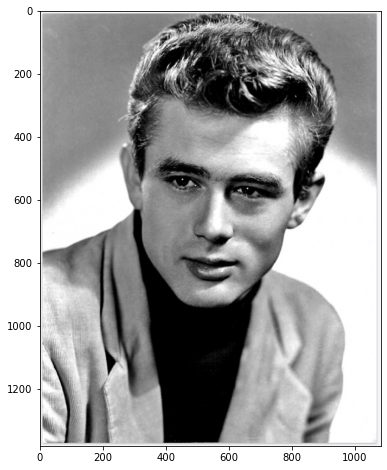

In [2]:
img = mpimg.imread('./data/face_test_01.jpg')
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [5]:
import requests

client_id = ""
client_secret = ""

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image': open('./data/face_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url,  files=files, headers=headers)

In [6]:
#JSON은 Java Script Object Notation의 약자로 
#웹서버와 클라이언트 간의 데이터 교환에 많이 사용
#json은 dict와 유사한 구조-> API를 사용한 결과 json 데이터 형태로 출력

import json

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

#네이버 유명인 인식 api 적용 결과

{
    "info": {
        "size": {
            "width": 1082,
            "height": 1380
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "이병헌",
                "confidence": 0.173103
            }
        }
    ]
}


In [5]:
#얼굴 감지 API
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('../data/face_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url, files=files, headers=headers)

parsed = json.loads(response.text)

#ensure_ascii=False : utf-8로 인코딩된 한글을 제대로 표시해 줌
print(json.dumps(parsed, indent=4, sort_keys=False, 
                 ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1082,
            "height": 1380
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 328,
                "y": 450,
                "width": 458,
                "height": 458
            },
            "landmark": {
                "leftEye": {
                    "x": 449,
                    "y": 532
                },
                "rightEye": {
                    "x": 666,
                    "y": 568
                },
                "nose": {
                    "x": 539,
                    "y": 694
                },
                "leftMouth": {
                    "x": 448,
                    "y": 782
                },
                "rightMouth": {
                    "x": 636,
                    "y": 799
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999998
            },
         

## 2. 인식된 얼굴 사진에 정보를 표시

In [7]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('./data/face_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)

In [8]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [9]:
detect_result['faces']

[{'roi': {'x': 328, 'y': 450, 'width': 458, 'height': 458},
  'landmark': {'leftEye': {'x': 449, 'y': 532},
   'rightEye': {'x': 666, 'y': 568},
   'nose': {'x': 539, 'y': 694},
   'leftMouth': {'x': 448, 'y': 782},
   'rightMouth': {'x': 636, 'y': 799}},
  'gender': {'value': 'male', 'confidence': 0.999998},
  'age': {'value': '26~30', 'confidence': 0.17594},
  'emotion': {'value': 'neutral', 'confidence': 0.999995},
  'pose': {'value': 'frontal_face', 'confidence': 0.997619}}]

In [10]:
detect_result['faces'][0]

{'roi': {'x': 328, 'y': 450, 'width': 458, 'height': 458},
 'landmark': {'leftEye': {'x': 449, 'y': 532},
  'rightEye': {'x': 666, 'y': 568},
  'nose': {'x': 539, 'y': 694},
  'leftMouth': {'x': 448, 'y': 782},
  'rightMouth': {'x': 636, 'y': 799}},
 'gender': {'value': 'male', 'confidence': 0.999998},
 'age': {'value': '26~30', 'confidence': 0.17594},
 'emotion': {'value': 'neutral', 'confidence': 0.999995},
 'pose': {'value': 'frontal_face', 'confidence': 0.997619}}

In [11]:
#각도의 위치(region of interest) -x,y좌표, 높이, 넓이
detect_result['faces'][0]['roi']

{'x': 328, 'y': 450, 'width': 458, 'height': 458}

In [12]:
detect_result['faces'][0]['gender']

{'value': 'male', 'confidence': 0.999998}

In [13]:
detect_result['faces'][0]['age']

{'value': '26~30', 'confidence': 0.17594}

In [14]:
detect_result['faces'][0]['emotion']

{'value': 'neutral', 'confidence': 0.999995}

In [15]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = \
detect_result['faces'][0]['gender'].values()

emotion, emotion_confidence = \
detect_result['faces'][0]['emotion'].values()

age, age_confidence = detect_result['faces'][0]['age'].values()

In [16]:
annotation = gender + ' : ' + str(gen_confidence) + \
                '\n' + emotion + ' : ' + str(emotion_confidence) + \
                '\n' + age + ' : ' + str(age_confidence)

print(annotation)

male : 0.999998
neutral : 0.999995
26~30 : 0.17594


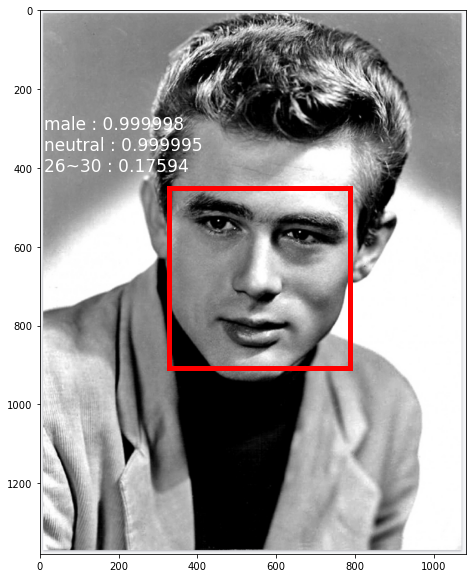

In [18]:
#patches : 사진에 도형을 그릴 수 있게 도와주는 모듈
import matplotlib.patches as patches
img = mpimg.imread('./data/face_test_01.jpg')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y),w,h,
                              linewidth=5,
                              edgecolor='r',
                              facecolor='none')
ax.add_patch(rect_face)

plt.text(10, 400 , annotation, wrap=True, 
         fontsize=17, color='white')
plt.show()

## 3. 여러 얼굴이 있는 사진에 대한 정보를 표시해보자

In [19]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('./data/face_test_02.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)

In [20]:
detect_result

{'info': {'size': {'width': 1868, 'height': 1252}, 'faceCount': 3},
 'faces': [{'roi': {'x': 833, 'y': 453, 'width': 208, 'height': 208},
   'landmark': {'leftEye': {'x': 889, 'y': 517},
    'rightEye': {'x': 977, 'y': 513},
    'nose': {'x': 928, 'y': 551},
    'leftMouth': {'x': 892, 'y': 602},
    'rightMouth': {'x': 975, 'y': 600}},
   'gender': {'value': 'child', 'confidence': 1.0},
   'age': {'value': '0~2', 'confidence': 1.0},
   'emotion': {'value': 'laugh', 'confidence': 0.995791},
   'pose': {'value': 'frontal_face', 'confidence': 0.999813}},
  {'roi': {'x': 1098, 'y': 341, 'width': 249, 'height': 249},
   'landmark': None,
   'gender': {'value': 'female', 'confidence': 0.997118},
   'age': {'value': '21~25', 'confidence': 0.246723},
   'emotion': {'value': 'talking', 'confidence': 0.535313},
   'pose': {'value': 'left_face', 'confidence': 0.918109}},
  {'roi': {'x': 409, 'y': 374, 'width': 268, 'height': 268},
   'landmark': None,
   'gender': {'value': 'female', 'confidence

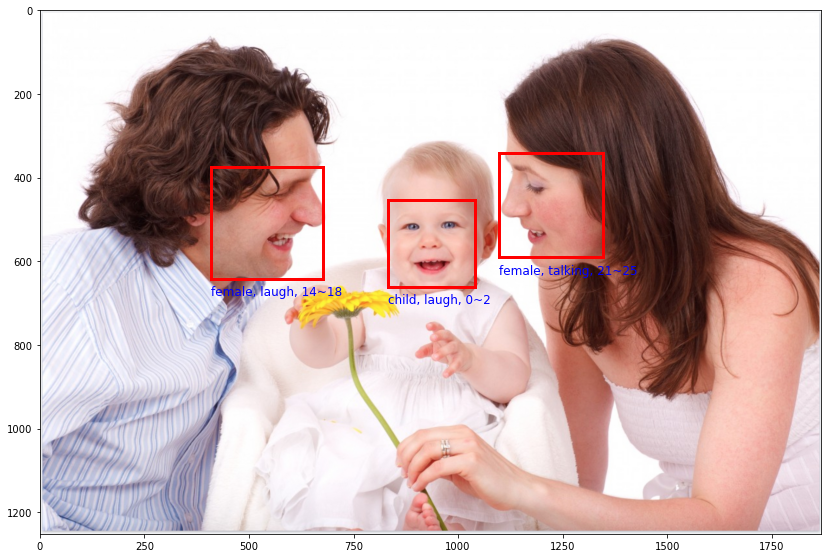

In [22]:
img = mpimg.imread('./data/face_test_02.jpg')
fig,ax = plt.subplots(figsize=(14,10))
ax.imshow(img)

for each in detect_result['faces']:
    x, y, w, h = each['roi'].values()
    gender, gen_confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()
    age, age_confidence = each['age'].values()
    
    rect_face = patches.Rectangle((x,y),w,h, linewidth=3, 
                                  edgecolor='r', facecolor='none')
    
    ant_letter = gender + ', ' + emotion +', ' +  age
    plt.text(x, y+h+40, ant_letter, size=12, color='blue')
    ax.add_patch(rect_face)

plt.show()